In [4]:
#Import all Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Concatenate
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import Input
from keras import optimizers
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd



In [5]:

'''walks through the train directory,
creates a dataframe with class and filepaths for all images present in the train directory'''

Dataset_Dir="C:\\Users\\Uma\\Anacondanew\\envs\\uma_tensor\\CNN COLOR Shallow\\\color_clean_balanced\\color_clean\\"

data = []
for category in sorted(os.listdir(Dataset_Dir)):
    for file in sorted(os.listdir(os.path.join(Dataset_Dir, category))):
        data.append((category, os.path.join(Dataset_Dir, category,  file)))

df = pd.DataFrame(data, columns=['class', 'file_path'])

In [6]:
len_df = len(df)
print(f"There are {len_df} images")

There are 12116 images


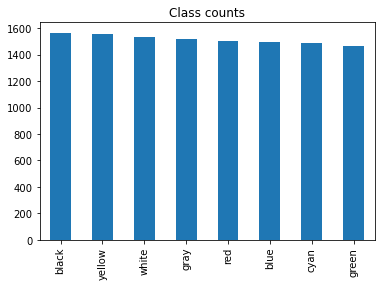

In [7]:
df['class'].value_counts().plot(kind='bar');
plt.title('Class counts');

In [8]:
CATEGORIES = ["black", "blue","cyan","gray","green","white","yellow","red"]



IMG_SIZE = 100
training_data = []

#for training 
def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(Dataset_Dir,category)  # create path to categories
        class_num = CATEGORIES.index(category)  # get the classification  
        print (class_num)
        
        for img in tqdm(os.listdir(path)):  # iterate over each image per classes
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.COLOR_BGR2RGB)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_training_data()            

  1%|          | 11/1564 [00:00<00:16, 96.02it/s]

0


  1%|          | 11/1495 [00:00<00:15, 98.79it/s]

1


  1%|          | 16/1489 [00:00<00:10, 139.00it/s]

2


  1%|          | 11/1518 [00:00<00:14, 101.27it/s]

3


  0%|          | 7/1462 [00:00<00:21, 68.56it/s]

4


  1%|          | 13/1530 [00:00<00:13, 114.81it/s]

5


  1%|          | 13/1554 [00:00<00:13, 117.91it/s]

6


  1%|          | 10/1504 [00:00<00:15, 96.13it/s]

7


100%|██████████| 1504/1504 [00:19<00:00, 78.80it/s]


In [9]:
import pandas as pd
df = pd.DataFrame(training_data, columns=['class', 'class_num'])

In [11]:
print(len(training_data))

12115


In [12]:
X_train = []
y_train = []

In [13]:
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)



#Data scaling and Splitting 70% for training and 30% for testing

In [14]:

X_train = X_train/255.0  

X_train,X_test,y_train,y_test= train_test_split(X_train,y_train,test_size=0.3, random_state=1)

In [15]:
len(X_train)

8480

In [16]:
len(X_test)

3635

# CNN with keras
Let's start by defining the topology of Shallow Color CNN. A single Conv2D layer, followed by a Dropout layer to prevent overfitting, which then gets flattened into a conventional deep neural network, with 512 neurons, a 50% dropout layer, and the final softamx layer for eight possible classification results.

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten  
def createModel(input_shape=(100,100,3)):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))#convolution layer
    model.add(Dropout(0.25))
 
    model.add(Flatten())#convert 2D to single dimension
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax')) #output eight classes
         
    return model

In [19]:
opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model = createModel(X_train.shape[1:])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               163840512 
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 4104      
Total params: 163,845,512
Trainable params: 163,845,512
Non-trainable params: 0
__________________________________________

In [21]:
history=model.fit(X_train, y_train, batch_size=128, epochs=80, validation_data=(X_test,y_test))

Epoch 1/80
67/67 [==============================] - 388s 6s/step - loss: 2.0490 - acc: 0.5744 - val_loss: 0.6836 - val_acc: 0.8143
Epoch 2/80
67/67 [==============================] - 380s 6s/step - loss: 0.6051 - acc: 0.8216 - val_loss: 0.4077 - val_acc: 0.8627
Epoch 3/80
67/67 [==============================] - 375s 6s/step - loss: 0.3971 - acc: 0.8784 - val_loss: 0.3289 - val_acc: 0.8941
Epoch 4/80
67/67 [==============================] - 385s 6s/step - loss: 0.2874 - acc: 0.9114 - val_loss: 0.3051 - val_acc: 0.8930
Epoch 5/80
67/67 [==============================] - 385s 6s/step - loss: 0.2384 - acc: 0.9254 - val_loss: 0.3192 - val_acc: 0.8911
Epoch 6/80
67/67 [==============================] - 378s 6s/step - loss: 0.1843 - acc: 0.9395 - val_loss: 0.2159 - val_acc: 0.9290
Epoch 7/80
67/67 [==============================] - 378s 6s/step - loss: 0.1592 - acc: 0.9482 - val_loss: 0.2224 - val_acc: 0.9252
Epoch 8/80
67/67 [==============================] - 379s 6s/step - loss: 0.1255 - a

In [22]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

114/114 [==============================] - 66s 582ms/step - loss: 0.3157 - acc: 0.9447
Test loss: 0.3157425820827484
Test accuracy: 0.9447042346000671


In [23]:
model.save('ShallowcolorCNN_80.h5')

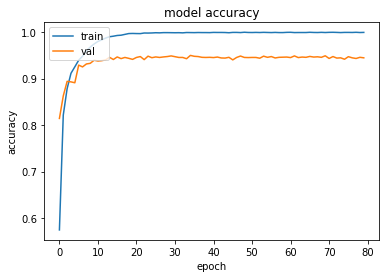

In [24]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=10, batch_size=32)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
# make a prediction
y_train_predict = model.predict_classes(X_train)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


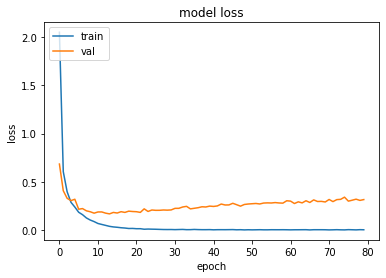

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(X_test)

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       500
           1       0.96      0.94      0.95       452
           2       0.97      1.00      0.98       454
           3       0.87      0.84      0.85       465
           4       0.98      0.92      0.95       402
           5       0.90      0.94      0.92       451
           6       0.99      0.98      0.98       457
           7       0.98      0.99      0.99       454

    accuracy                           0.94      3635
   macro avg       0.95      0.94      0.95      3635
weighted avg       0.95      0.94      0.94      3635



In [30]:
y_test_predict = model.predict_classes(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_test_predict)
#plt.figure(figsize=(10, 10))
#plt.figure(figsize=(10, 9))
plt.title('Confusion matrix for test ')
ax=sns.heatmap(cm, annot=True, fmt="d")
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))


(8.0, 0.0)

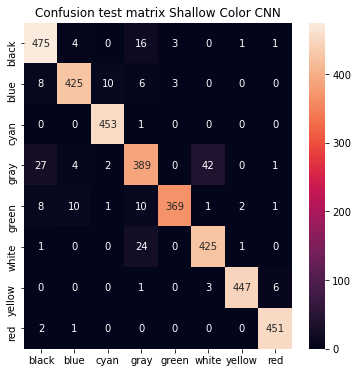

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test,y_test_predict)
plt.figure(figsize=(6, 6))


plt.title('Confusion test matrix Shallow Color CNN')


ax=sns.heatmap(cm, annot=True, fmt="d")
ax.xaxis.set_ticklabels(["black", "blue","cyan","gray","green","white","yellow","red"]); ax.yaxis.set_ticklabels(["black", "blue","cyan","gray","green","white","yellow","red"]);
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))